Task1-Om Gholap

In [1]:
import numpy as np 

import pandas as pd

import scipy as sp
from scipy import stats
# from scipy import metrics

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_set = "http://bit.ly/w-data"
df = pd.read_csv(data_set)

df.head(15)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
print(df.describe())
print(df.shape)

           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000
(25, 2)


In [4]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [5]:
print("Skewness of the data_set",stats.skew(df))
print("Kurtosis of the data_set",stats.kurtosis(df))

Skewness of the data_set [0.17872206 0.21968605]
Kurtosis of the data_set [-1.28683564 -1.4015694 ]


<AxesSubplot:xlabel='Hours'>

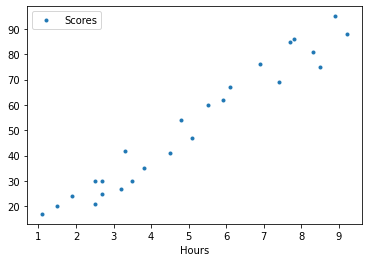

In [6]:

df.plot(x = "Hours", y = "Scores", style=".")


In [7]:
X = df.iloc[:,:-1]
Y = df.iloc[:,1]

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=40)

print("model split")

model split


In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

print("model fit")

model fit


# y = mx+c 
line = model.coef_*X+model.intercept_
plt.scatter(X,Y)
plt.plot(X,line)

In [10]:
print(X_test)

    Hours
15    8.9
24    7.8
14    1.1
19    7.4
13    3.3


In [11]:
y_predict = model.predict(X_test)

In [12]:
df_compare = pd.DataFrame({"Actual_data":y_test,"predicted_data":y_predict})
df_compare

,Actual_data,predicted_data
15,95,88.446633
24,86,77.732028
14,17,12.470343
19,69,73.835808
13,42,33.899553


In [13]:
# # checking prediction for student studying for 9.25 hrs a day

# student_hours = 9.25
# percentage_predict = model.predict(student_hours)

# print("For",student_hours,'The percentage prediction is',percentage_predict)

# You can also test with your own data
hours = [[9.25]]
own_pred = model.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

# model.predict([[9.25]])

No of Hours = [[9.25]]
Predicted Score = 91.85582531626392


In [14]:
from sklearn import metrics

print(metrics.r2_score(y_test,y_predict))


0.9466449081971943


Write model to file 

In [15]:
import joblib
joblib.dump(model, 'model.pkl')

['model.pkl']

In [16]:
pwd

'd:\\SparkFoundation(Grip)\\Task 1'